## 합성곱 신경망
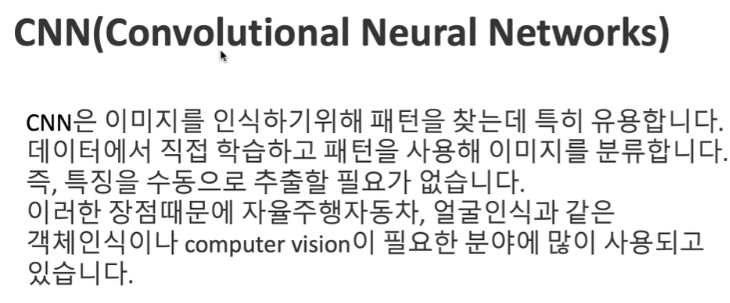
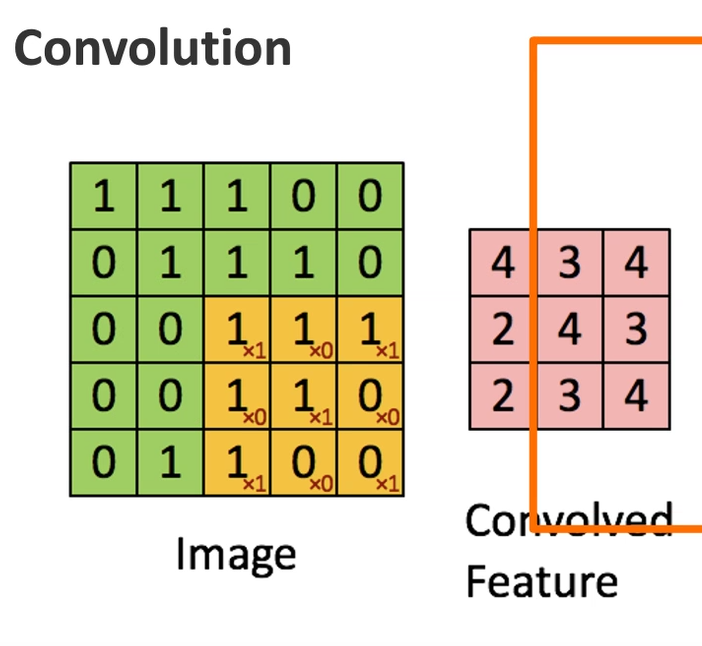
<b>9개의 픽셀을 합쳐서 1개의 픽셀을 만들어낸다 -> 합성곱</b><br>
1.이미지의 특징을 잡아 축소한다.<br>
2.그 이미지의 특징을 잡아 또 축소한다.<br>
3.몇 단계를 반복한다. 그러므로 CNN은 여러 단계로 이루어져 있다<br>
<br>
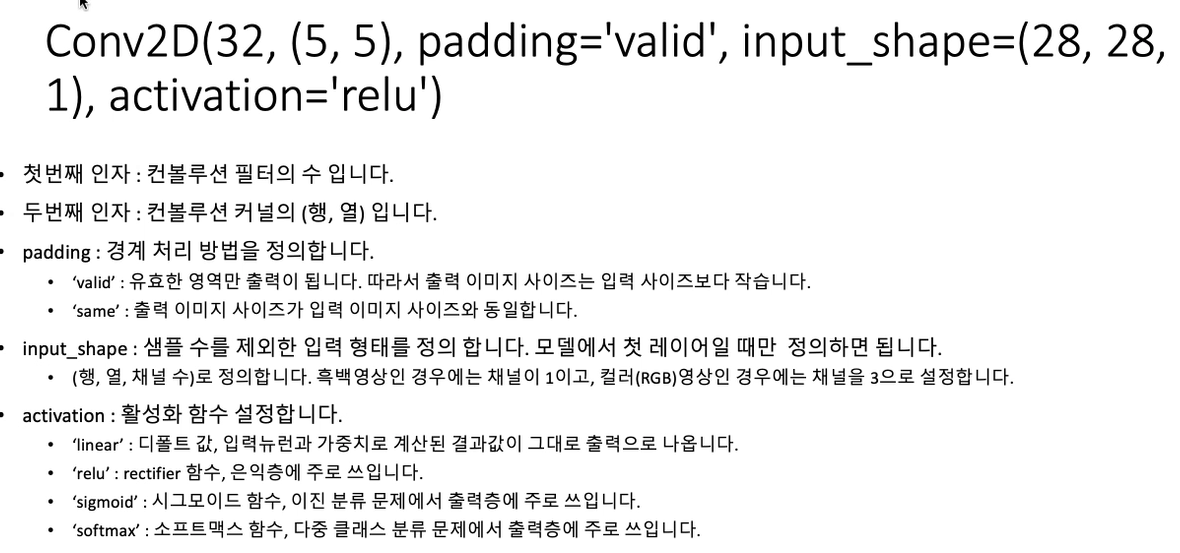
<b>valid 하는 방법!</b><br>
1. 4개의 픽셀에서 주변에 픽셀이 더 감싸고 있다고 생각하고 거기서 특징 뽑아내기<br>
2. 옆의 4개의 픽셀도 주변에 감싸져 있다고 생각하고 특징 뽑아내기<br>
(복잡한 사진에 사용)<br>
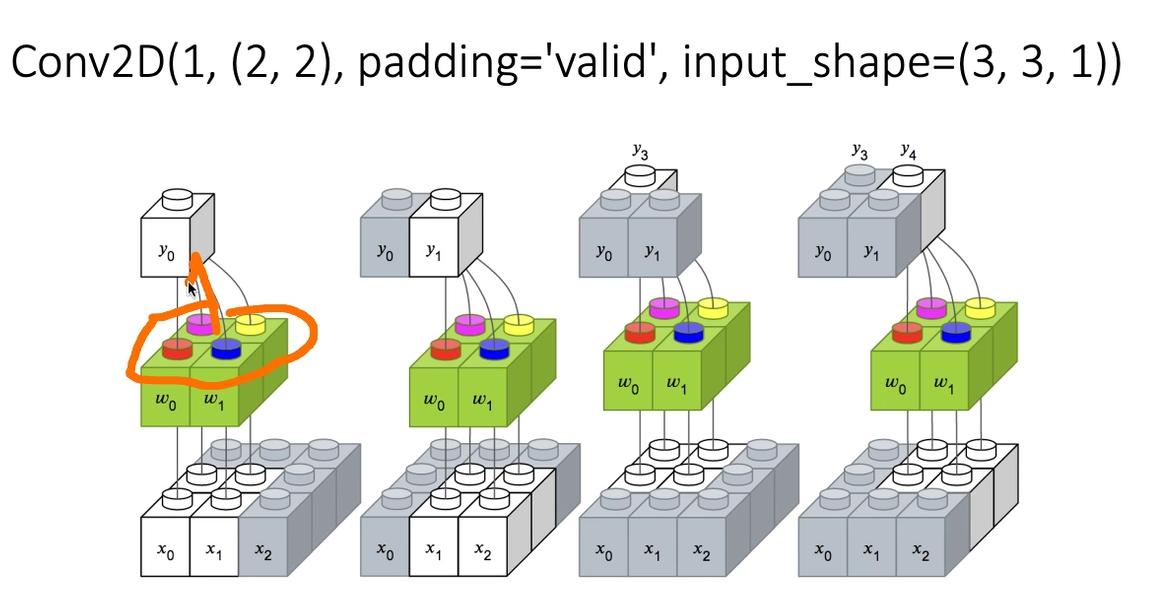

In [1]:
import keras
keras.__version__

'2.8.0'

In [2]:
from keras import layers
from keras import models

In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu',input_shape=(28,28,1)))
#합성곱 사이즈 (3,3)
#입력 값 28*28
#흑백은 1, 컬러는 3(RGB)
#activation function이 뭔데.

model.add(layers.MaxPool2D((2,2)))
#CNN의 기본 공식. Maxpooling을 합성곱 사이사이에 넣어줘야 함
#(2,2) 아래 맥스풀링 설명 사진처럼 4개 단위로 보는 것임

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

## 맥스풀링
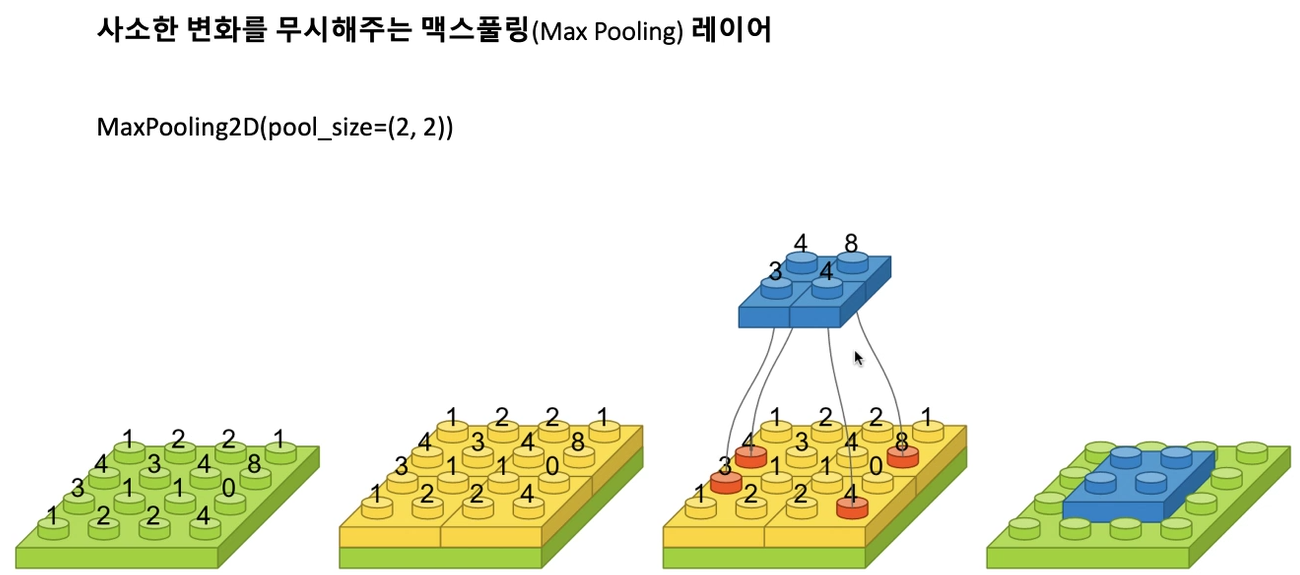
<br>
<b>그림의 작은 노이즈나 흐릿한 부분을 무시하고 제일 중요하고 큰 값만 넣어줌</b>
<br>
<br>
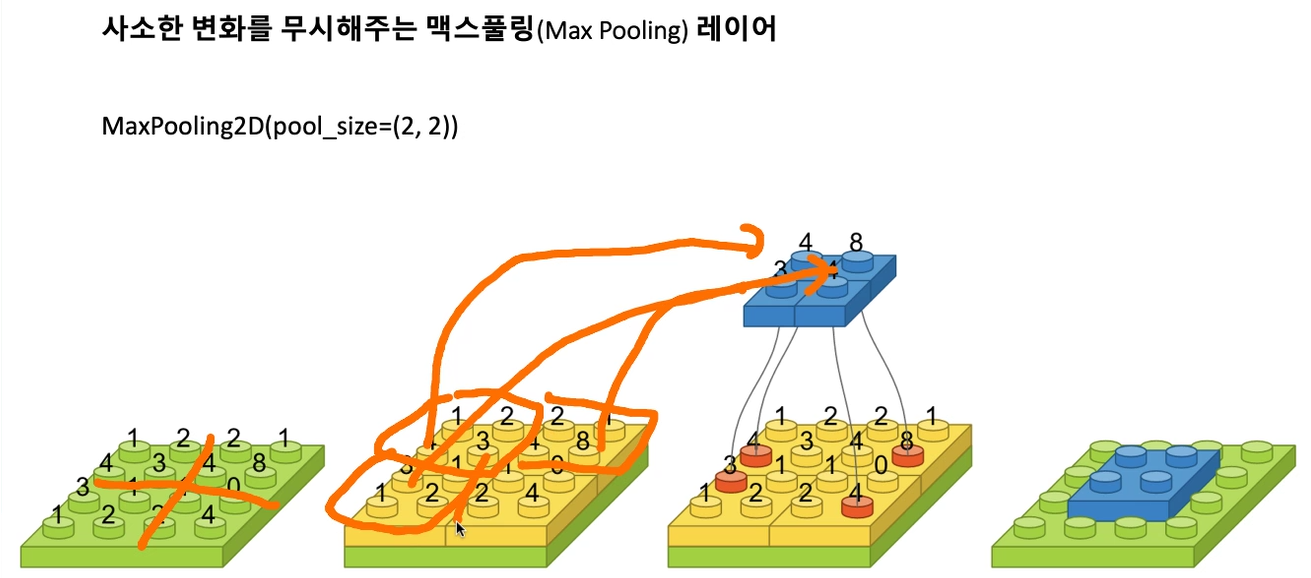
<br>
<b>면적은 노란 블럭에서 파란 블럭으로 4배 줄어들었지만 도드라진 특성만 보여줌</b>
<br>
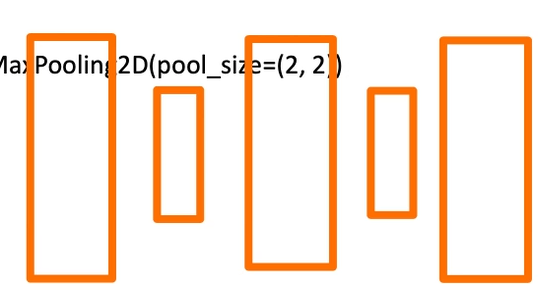
<br>
<b>CNN-맥스풀링-CNN-맥스풀링-CNN 이렇게 단계별로 사용해줘야함</b>
<br>
<br>
<br>

## 플래튼 레이어
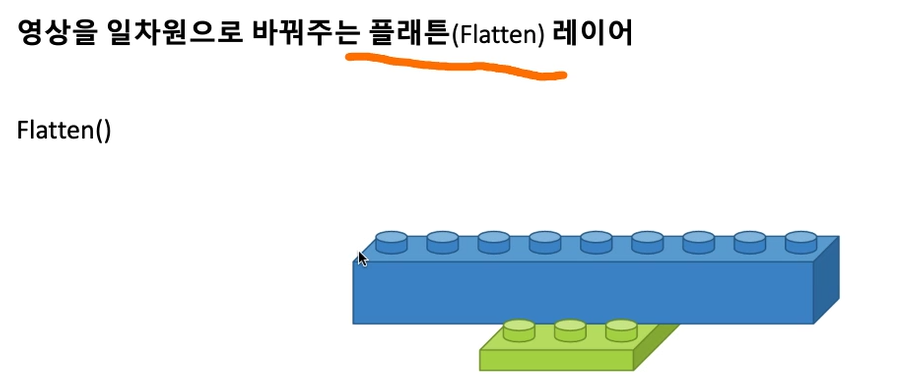
CNN을 하고 맥스풀링을 하고 CNN...하면 여전히 사이가 줄어든 이미지일 것이다.<br>
이미지 안에는 큰 이미지의 특징들이 그대로 남아있다.<br>
그대로 쓰기엔 부담스러우므로<br>
앞에서 우리가 사용했던 것처럼 일자로 쭉 피는 작업을 한다.<br>
이렇게 한 상태에서 학습을 시킨다<br>
<br>
플래튼 레이어로 나온 값을 분류하는 작업은 덴스 레이어로 분류하여 1번,5번 등 작업하게 될것이다<br>
<br>
<br>

## CNN & 맥스풀링
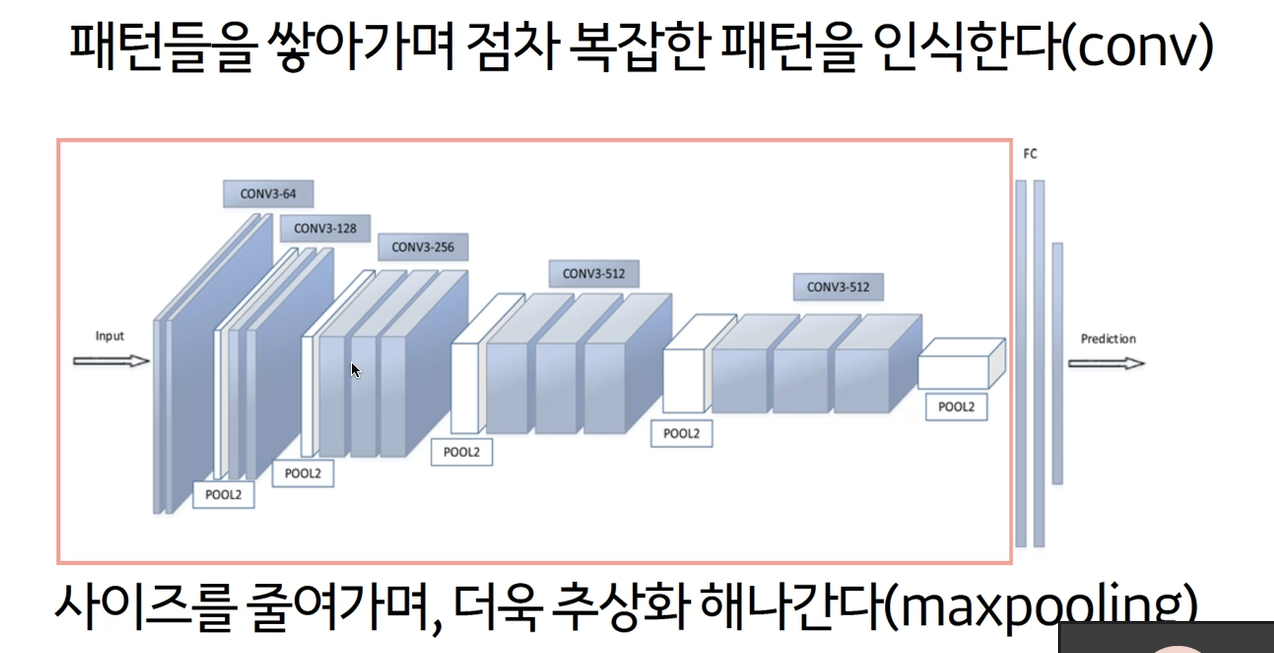

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-traina

In [6]:
model.add(layers.Flatten())
#일자로 펴기

model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
#특징을 0부터9까지.. 마지막에 10개 출력

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [8]:
from keras.datasets import mnist

#최종 결과로 얻어야 하는 것은 0~9 정수값으로 범주형 데이터를 만들어야하기 때문에
from tensorflow.keras.utils import to_categorical

(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

In [12]:
train_images=train_images.reshape((60000,28,28,1))
#인풋 이미지가 28,28,1이기 때문에 데이터를 바꿔주는 작업
#학습용 이미지가 총 60000개 / 테스트용 이미지가 총 10000개

train_images=train_images.astype('float32')/255
#28*28 이미지 안에 각각의 픽셀 하나 안에는 0~255 그레이 컬러값의 숫자가 들어가있음


test_images=test_images.reshape(10000,28,28,1)
test_images=test_images.astype('float32')/255

train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

In [14]:
#신경망 구성을 하고, 모델 만들고 나서 컴파일 ->
#손실 함수 지정, 로스 함수 지정, 옵티마이저 지정

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

#맨 끝이 소프트맥스이기 때문에 손실함수도 범주 크로스엔트로피로
#만약 둘 중에 하나 고르는 것이라면 바이너리 크로스엔트로피

#신경망 완성!

In [17]:
#학습 시키기

model.fit(train_images,train_labels,epochs=5,batch_size=64)
#학습용 데이터를 통째로 주는게 아니라 이미지를 줌 

#CNN으로 합성곱, 맥스풀링 등 단계 거치고, 플랫하게 펴주고, 덴스레이어를 두개 거친 후 값 뽑아냄

Epoch 1/5
938/938 [==============================] - 31s 32ms/step - loss: 0.9329 - accuracy: 0.6908
Epoch 2/5
938/938 [==============================] - 29s 31ms/step - loss: 0.2515 - accuracy: 0.9215
Epoch 3/5
938/938 [==============================] - 30s 31ms/step - loss: 0.1426 - accuracy: 0.9554
Epoch 4/5
938/938 [==============================] - 29s 31ms/step - loss: 0.1017 - accuracy: 0.9681
Epoch 5/5
938/938 [==============================] - 30s 32ms/step - loss: 0.0811 - accuracy: 0.9743


In [18]:
test_loss,test_acc=model.evaluate(test_images,test_labels)
#결과를 평가해보자

313/313 [==============================] - 2s 5ms/step - loss: 0.0669 - accuracy: 0.9790


In [19]:
test_acc
#이미지일 때 Dens layer를 사용하는 것보다 CNN을 사용하는 것이 더 정확도가 높다

0.9789999723434448